In [1]:
%pylab nbagg
import cma, como, como_restart
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [14]:
dimension = 10
num_kernels = 1 # number of single-objective solvers (population size)

In [15]:
np.random.rand(3, 5)

array([[0.86376003, 0.28588717, 0.45534819, 0.45899876, 0.70973463],
       [0.74110463, 0.25116419, 0.03966129, 0.55524693, 0.95782083],
       [0.99898619, 0.5497355 , 0.33096445, 0.80282103, 0.80210757]])

In [21]:
#list_of_solvers = como_restart.get_cmas(num_kernels * [dimension * [0]], 0.2) # produce `num_kernels cma instances`
list_of_solvers = como_restart.get_cmas(np.random.rand(num_kernels, dimension), 0.2) # produce `num_kernels cma instances`
moes = como_restart.Sofomore(list_of_solvers, opts = {'archive': True, 'restart': [-5, 5]}, reference_point = [11,11]) # create a como-cma-es instance

In [22]:
fitness = como_restart.FitFun(cma.ff.sphere, lambda x: cma.ff.sphere(x-1))
#fitness = como.FitFun(lambda x: 1/len(x) * cma.ff.sphere(x), lambda x: 1/len(x) * cma.ff.sphere(x-1)) 
# a callable bi-objective function

In [23]:
#moes.optimize(fitness)

In [24]:
#while not moes.stop():
for i in range(6000):
    solutions = moes.ask("all")
    objective_values = [fitness(x) for x in solutions]
    moes.tell(solutions, objective_values)
    moes.disp()          # display datas during the optimization
    moes.logger.add()    # logging data after each `ask` and `tell` call


Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    1     10 5.700888993530221e+01 1.0e+00 1.82e-01  2e-01  2e-01
    2     20 5.823934208817165e+01 1.2e+00 1.79e-01  2e-01  2e-01
    3     30 6.342615087500194e+01 1.2e+00 1.84e-01  2e-01  2e-01
  100   1000 7.224995741603512e+01 1.9e+00 1.36e-03  5e-04  7e-04
  200   2000 7.224999999997264e+01 1.9e+00 3.48e-01  3e-01  4e-01
  300   3000 8.233039109169995e+01 1.9e+00 4.44e-03  2e-03  2e-03
  400   4000 8.233076008897626e+01 2.1e+00 8.17e-06  1e-06  2e-06
  500   5000 9.239195340122338e+01 2.0e+00 4.62e-06  7e-07  9e-07
  600   6000 9.241153154358420e+01 2.1e+00 4.62e-06  7e-07  9e-07
  700   7000 9.419403895271623e+01 2.0e+00 4.65e-06  7e-07  9e-07
  800   8000 9.422562395750229e+01 2.1e+00 4.65e-06  7e-07  9e-07
  900   9000 9.541421113749659e+01 2.1e+00 4.67e-06  7e-07  9e-07
 1000  10000 9.603971497204127e+01 2.1e+00 4.67e-06  7e-07  9e-07
 1100  110

<IPython.core.display.Javascript object>


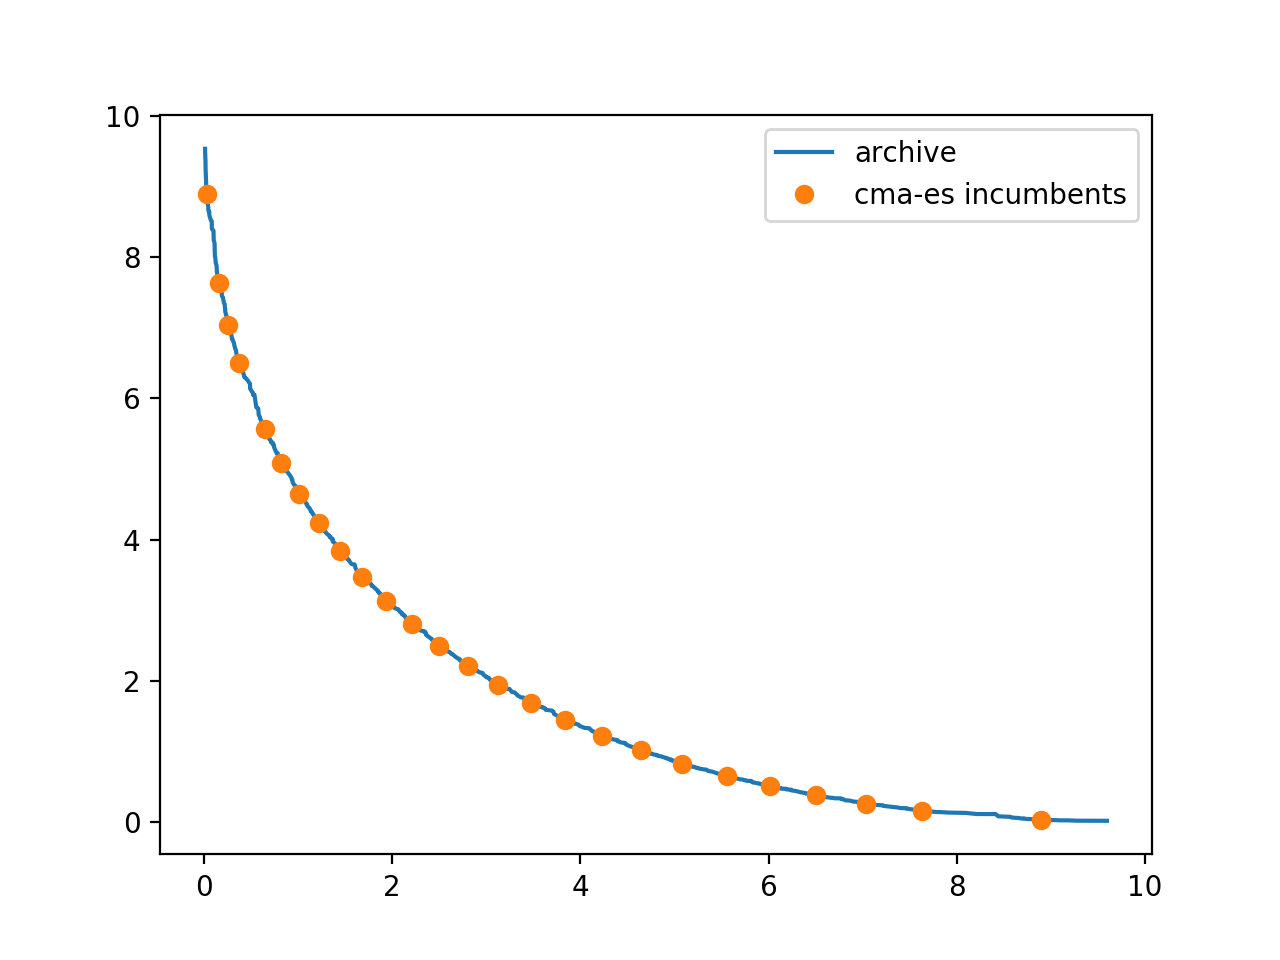

In [25]:
moes.logger.plot_front()

In [ ]:
figure()
moes.logger.plot_front()

In [ ]:
figure()
moes.logger.plot_front()

In [ ]:
moes.logger.plot_front()

In [ ]:
moes.logger.plot_front()

In [ ]:
moes.num_kernels

In [ ]:
kernel = moes.kernels[0]

In [ ]:
kernel.opts['tolx']